In [ ]:
!pip install torch torchvision torchaudio
!pip install easyocr
!pip install gmm

     |████████████████████████████████| 63.6 MB 58 kB/s 
     |████████████████████████████████| 47.7 MB 1.6 MB/s 
     |████████████████████████████████| 90 kB 5.0 MB/s 
  Created wheel for gmm: filename=GMM-0.3.3-py3-none-any.whl size=10951 sha256=97f9093f14801ae74d2ca084faf759c268d7ff779371df26b275d9d0e30d52e4
  Stored in directory: /root/.cache/pip/wheels/26/a4/2a/54f04bc3e57be866525fdc8f04a9c83229c781bce539c560df
Successfully built gmm


In [ ]:
!pip uninstall opencv-python-headless==4.5.5.62 
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python-headless 4.5.5.62
Uninstalling opencv-python-headless-4.5.5.62:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.62.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-64ac49e1.so.58.91.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-4b79e479.so.58.45.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-805734e8.so.56.51.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-018b8c17.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dist

In [ ]:
import easyocr
#download the model
reader = easyocr.Reader(['tr','en'], gpu = False)

Using CPU. Note: This module is much faster with a GPU.


1656 2339


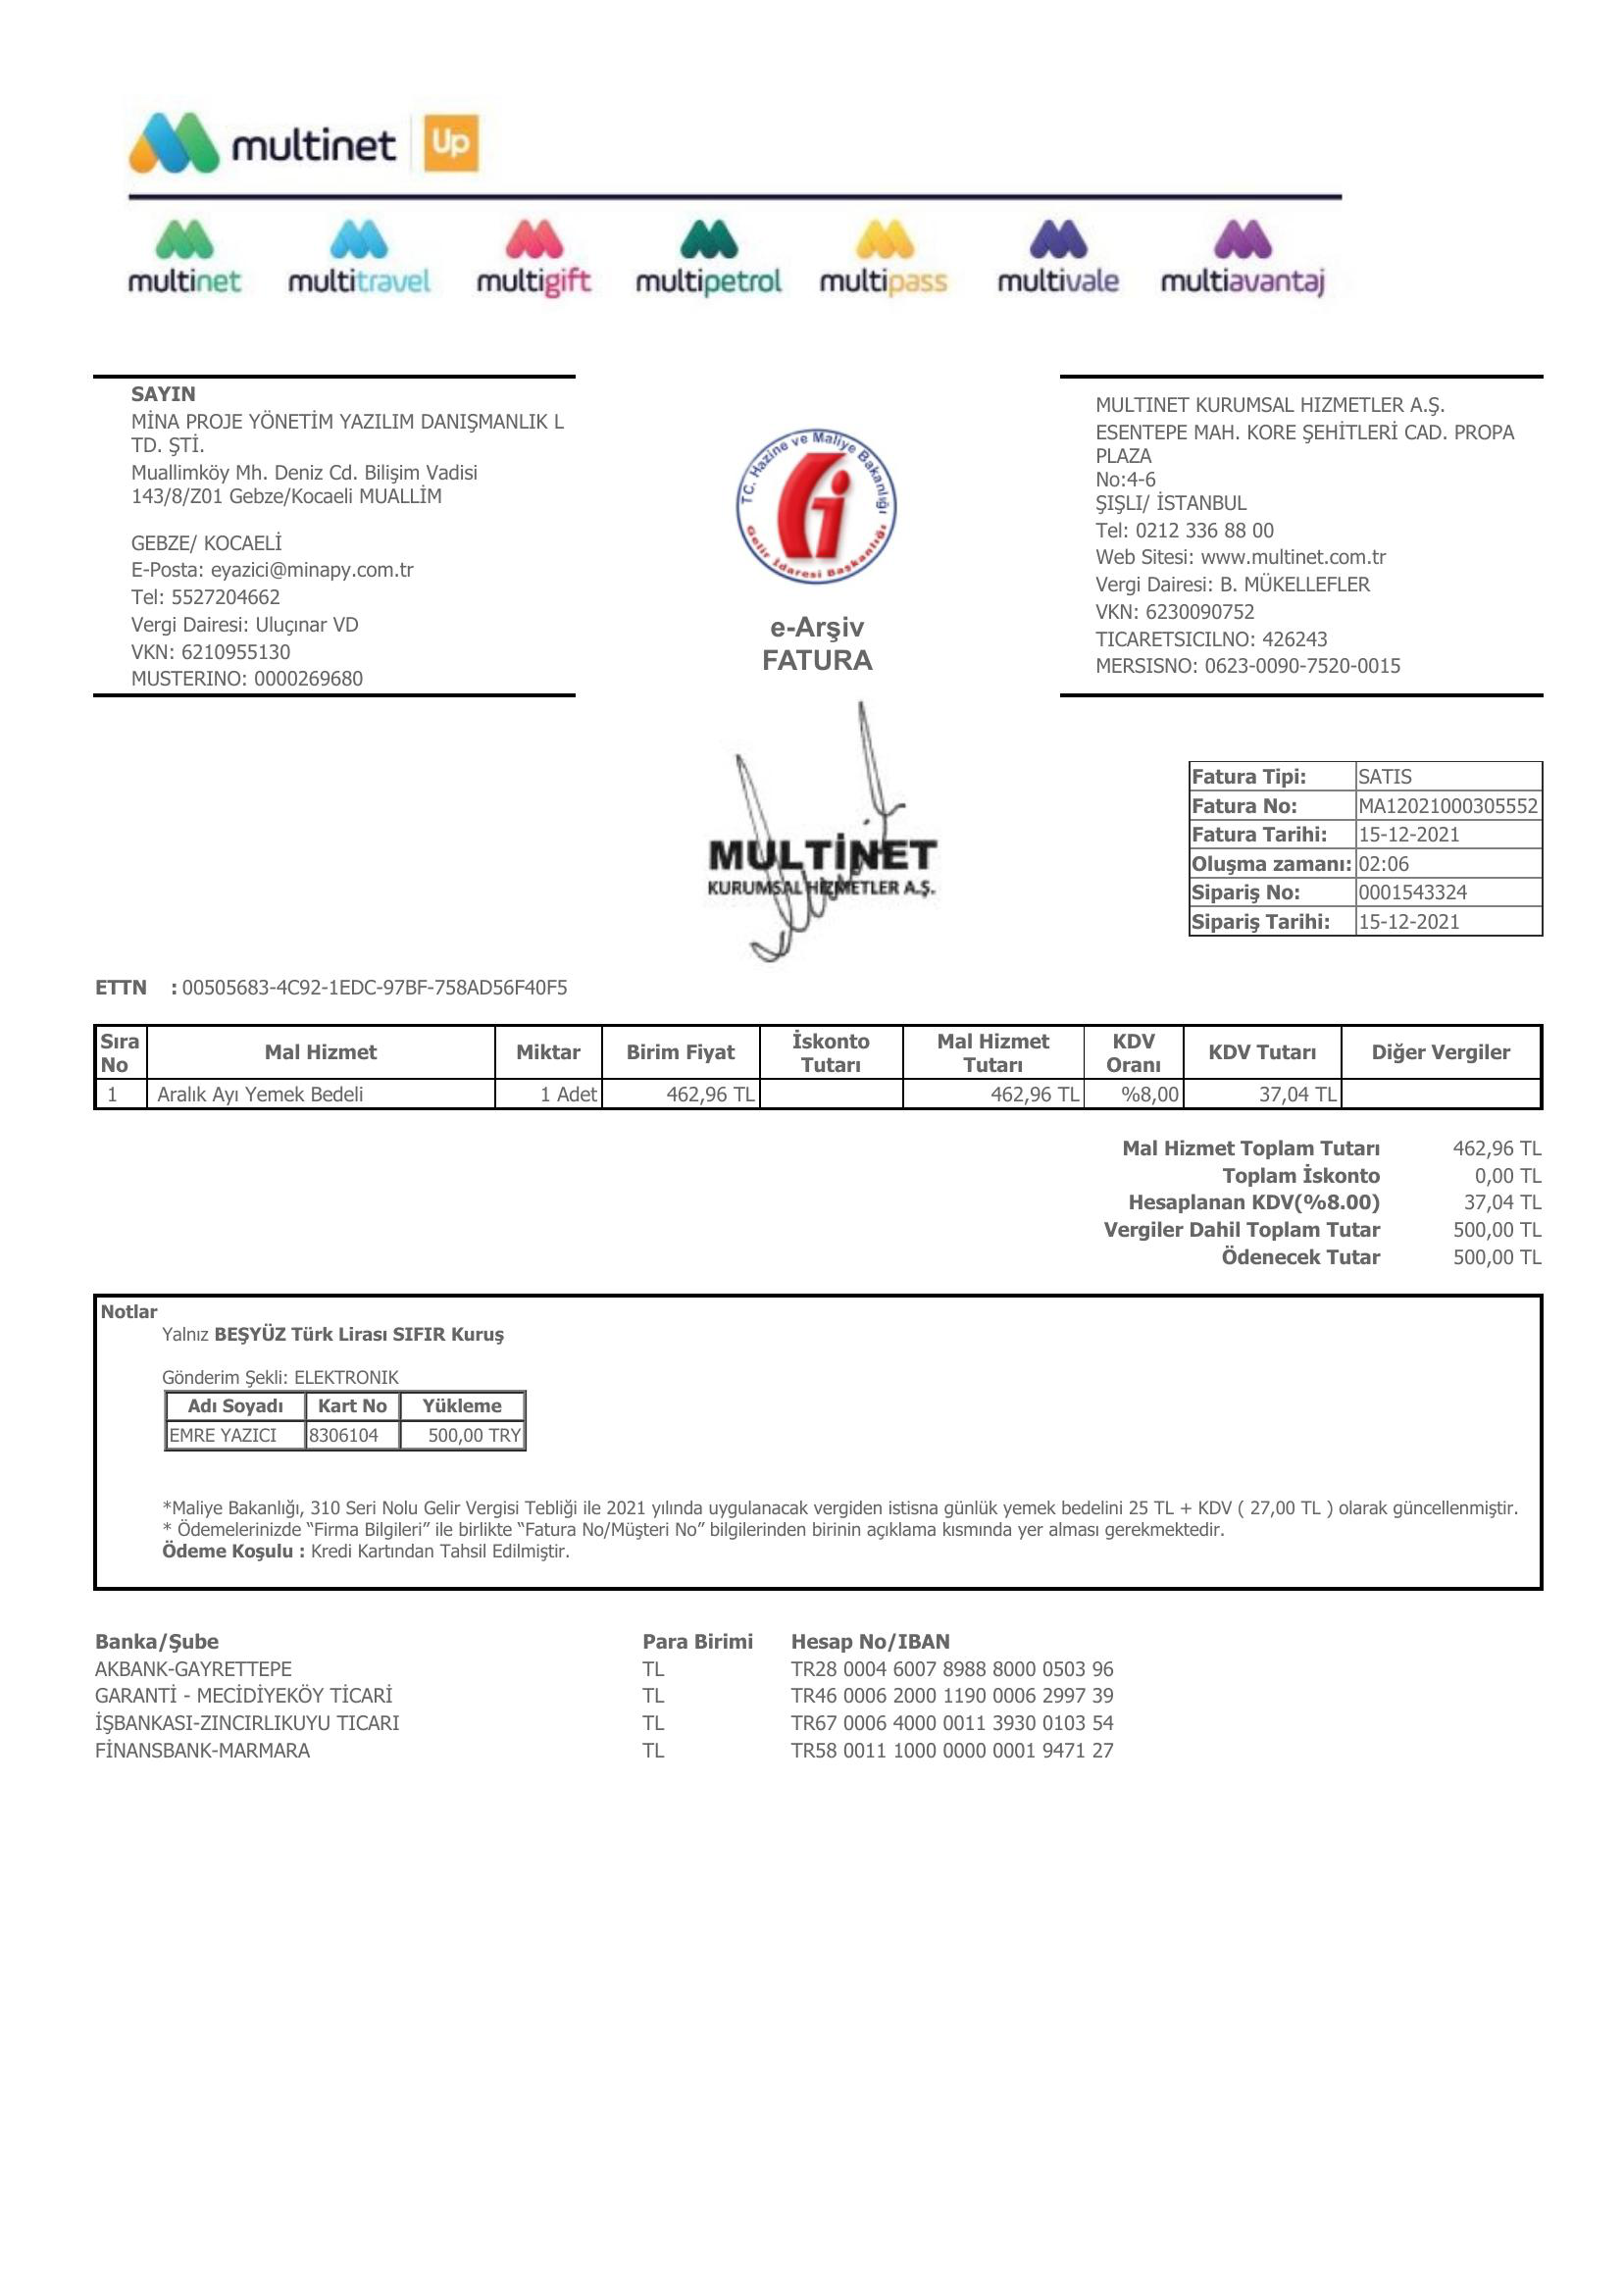

In [ ]:
# show an image
import PIL
import cv2
from PIL import ImageDraw
image_path='page3.jpg'
im = PIL.Image.open(image_path)
#im = PIL.Image.open("france.jfif")
width,height=im.size

print(width,height)

im

In [ ]:
bounds = reader.readtext(image_path)
bounds

[([[231, 125], [411, 125], [411, 169], [231, 169]],
  'multinet',
  0.9984402311732409),
 ([[435, 127], [485, 127], [485, 165], [435, 165]], 'Uo', 0.8765321882097593),
 ([[127, 269], [253, 269], [253, 305], [127, 305]],
  'multinet',
  0.9980970360172974),
 ([[291, 269], [445, 269], [445, 305], [291, 305]],
  'multitravel',
  0.957949816164022),
 ([[482, 266], [610, 266], [610, 311], [482, 311]],
  'multigift',
  0.9986371720720738),
 ([[644, 268], [802, 268], [802, 308], [644, 308]],
  'multipetrol',
  0.9996631052827897),
 ([[831, 269], [973, 269], [973, 307], [831, 307]],
  'multipass',
  0.8363800393893766),
 ([[1013, 269], [1147, 269], [1147, 305], [1013, 305]],
  'multivale',
  0.9173402968457064),
 ([[1178, 267], [1359, 267], [1359, 307], [1178, 307]],
  'multiavantaj',
  0.6995404901038836),
 ([[130, 390], [202, 390], [202, 414], [130, 414]],
  'SAYIN',
  0.9999387975857175),
 ([[1116, 400], [1474, 400], [1474, 428], [1116, 428]],
  'MULTINET KURUMSAL HIZMETLER A.Ş.',
  0.71022

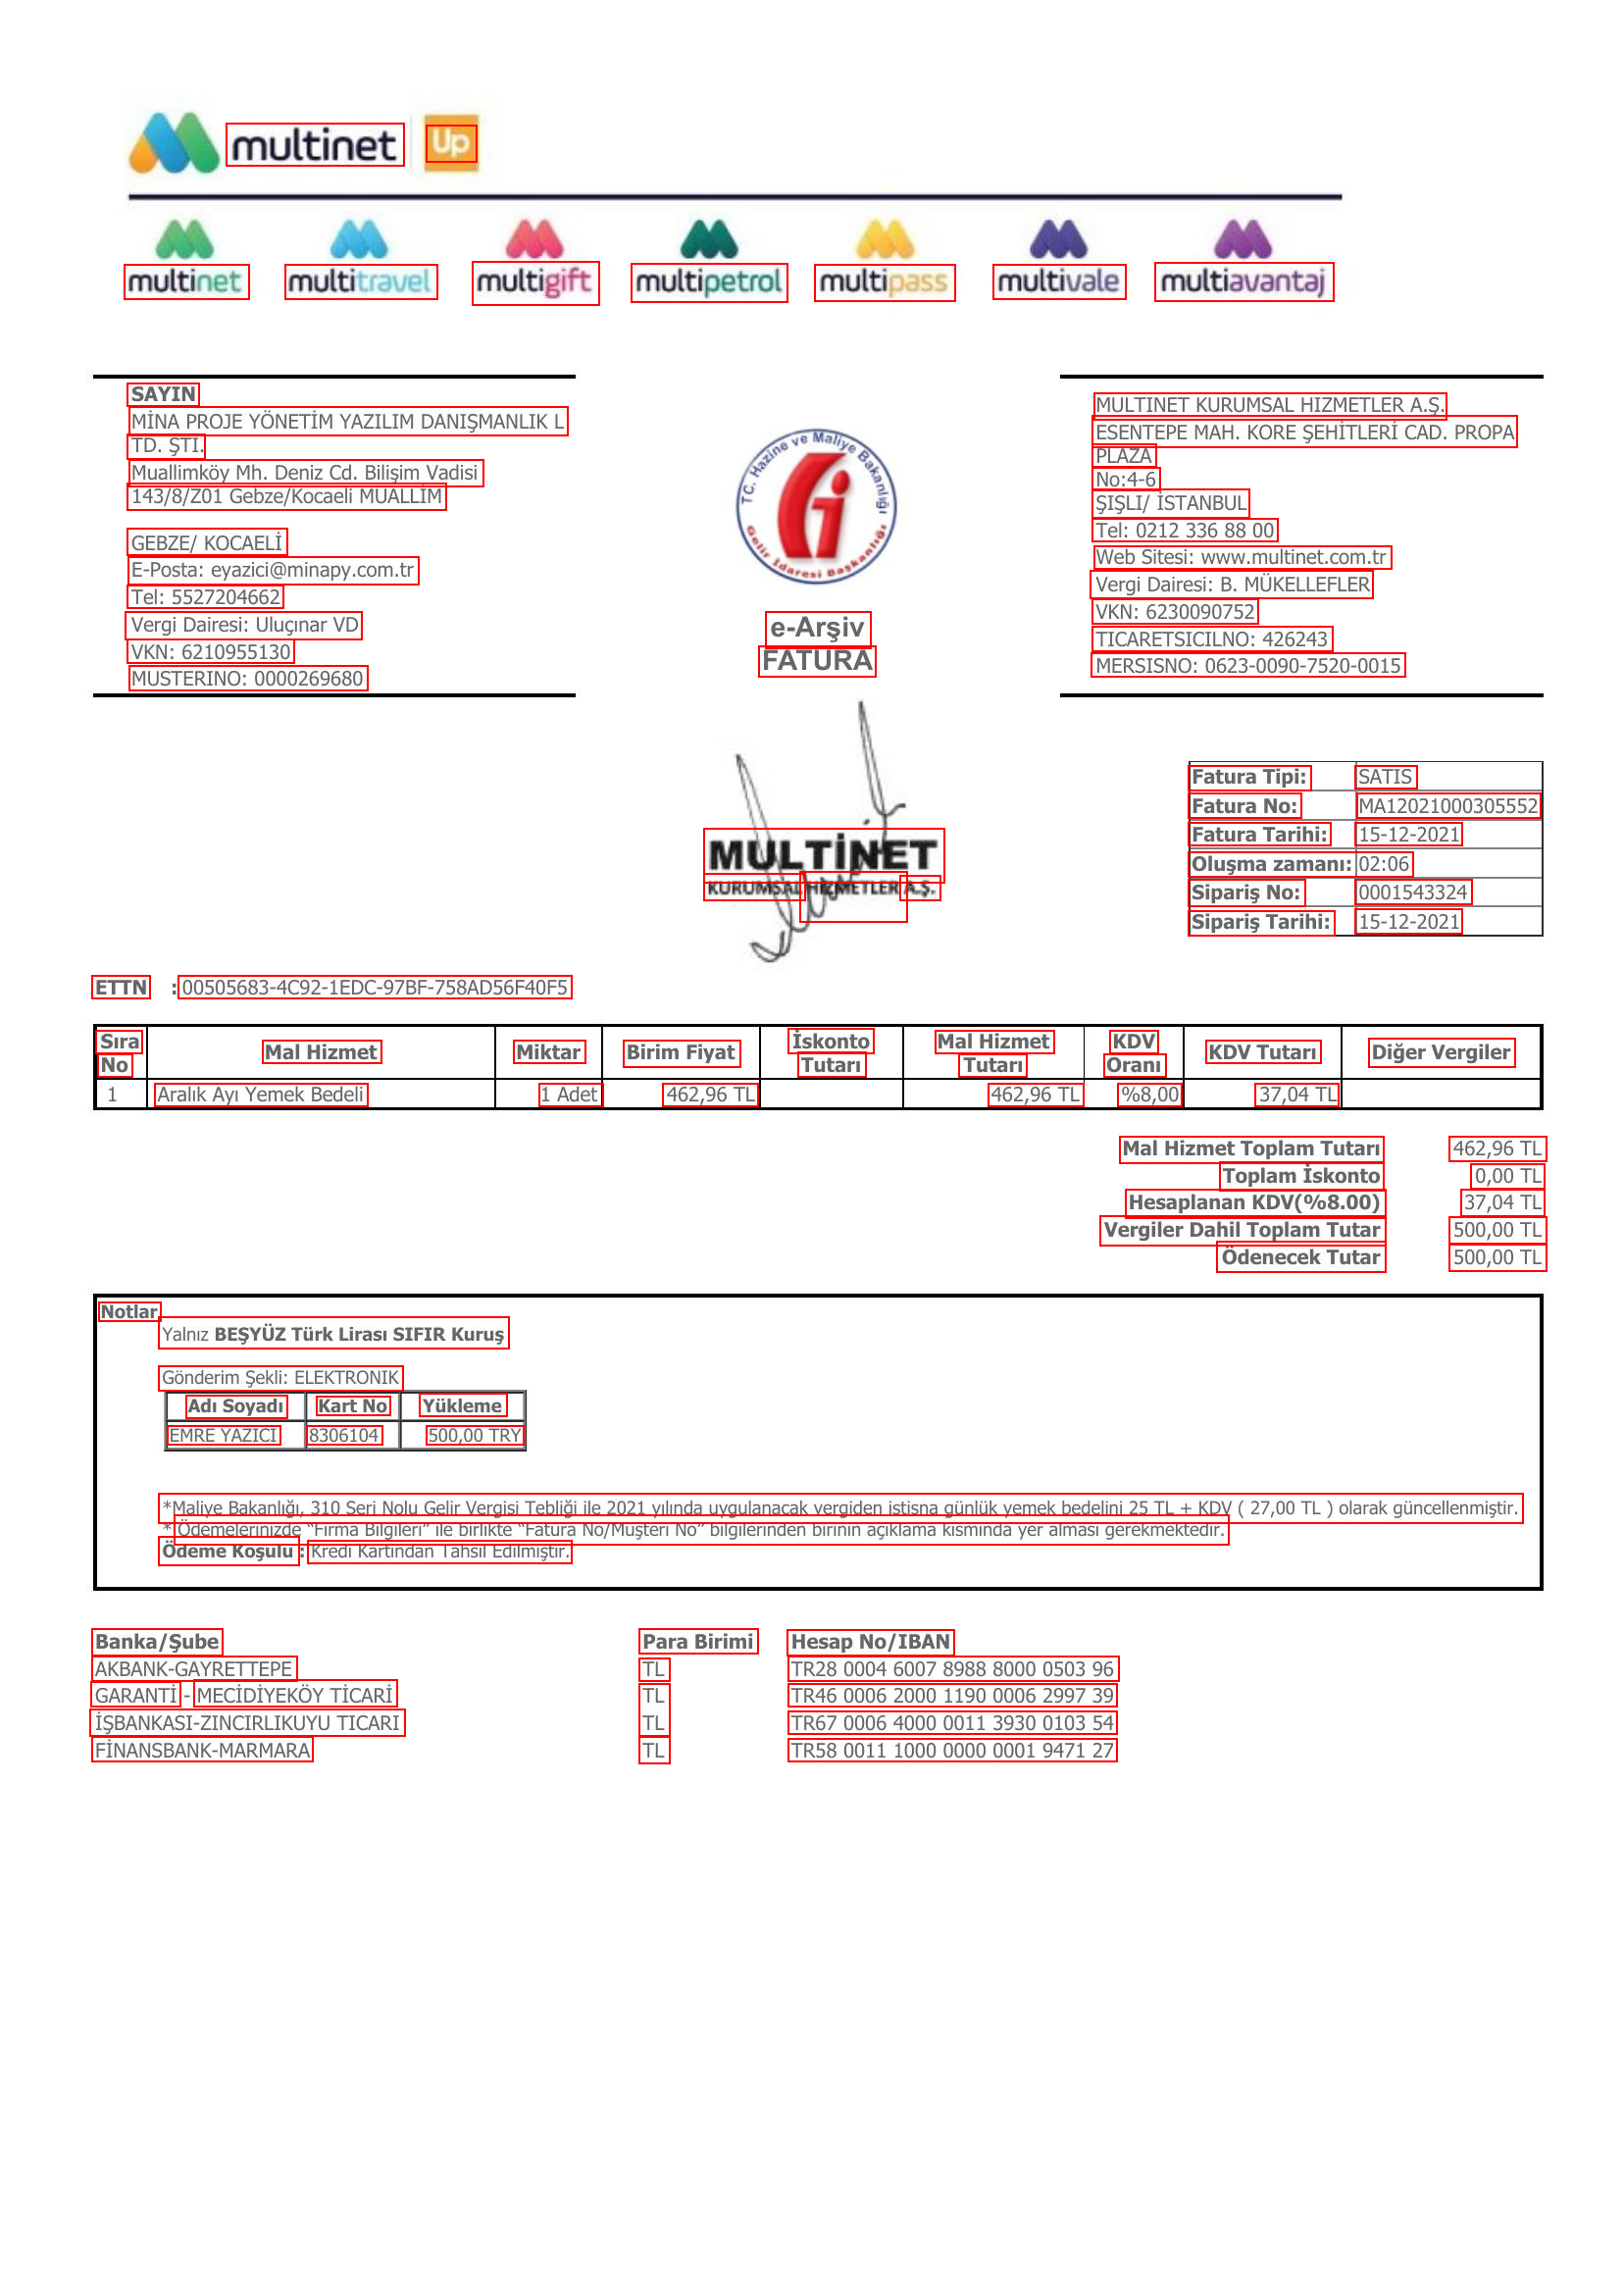

In [ ]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='red', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

(2339, 1656, 3)
[231, 125] [411, 125] [411, 169] [231, 169]
[435, 127] [485, 127] [485, 165] [435, 165]
[127, 269] [253, 269] [253, 305] [127, 305]
[291, 269] [445, 269] [445, 305] [291, 305]
[482, 266] [610, 266] [610, 311] [482, 311]
[644, 268] [802, 268] [802, 308] [644, 308]
[831, 269] [973, 269] [973, 307] [831, 307]
[1013, 269] [1147, 269] [1147, 305] [1013, 305]
[1178, 267] [1359, 267] [1359, 307] [1178, 307]
[130, 390] [202, 390] [202, 414] [130, 414]
[1116, 400] [1474, 400] [1474, 428] [1116, 428]
[132, 414] [578, 414] [578, 444] [132, 444]
[1114, 423] [1546, 423] [1546, 456] [1114, 456]
[130, 442] [208, 442] [208, 468] [130, 468]
[1114, 452] [1178, 452] [1178, 476] [1114, 476]
[132, 468] [492, 468] [492, 496] [132, 496]
[1114, 476] [1182, 476] [1182, 500] [1114, 500]
[130, 492] [454, 492] [454, 520] [130, 520]
[1114, 498] [1273, 498] [1273, 528] [1114, 528]
[1114, 528] [1302, 528] [1302, 552] [1114, 552]
[130, 538] [292, 538] [292, 566] [130, 566]
[1116, 556] [1418, 556] [141

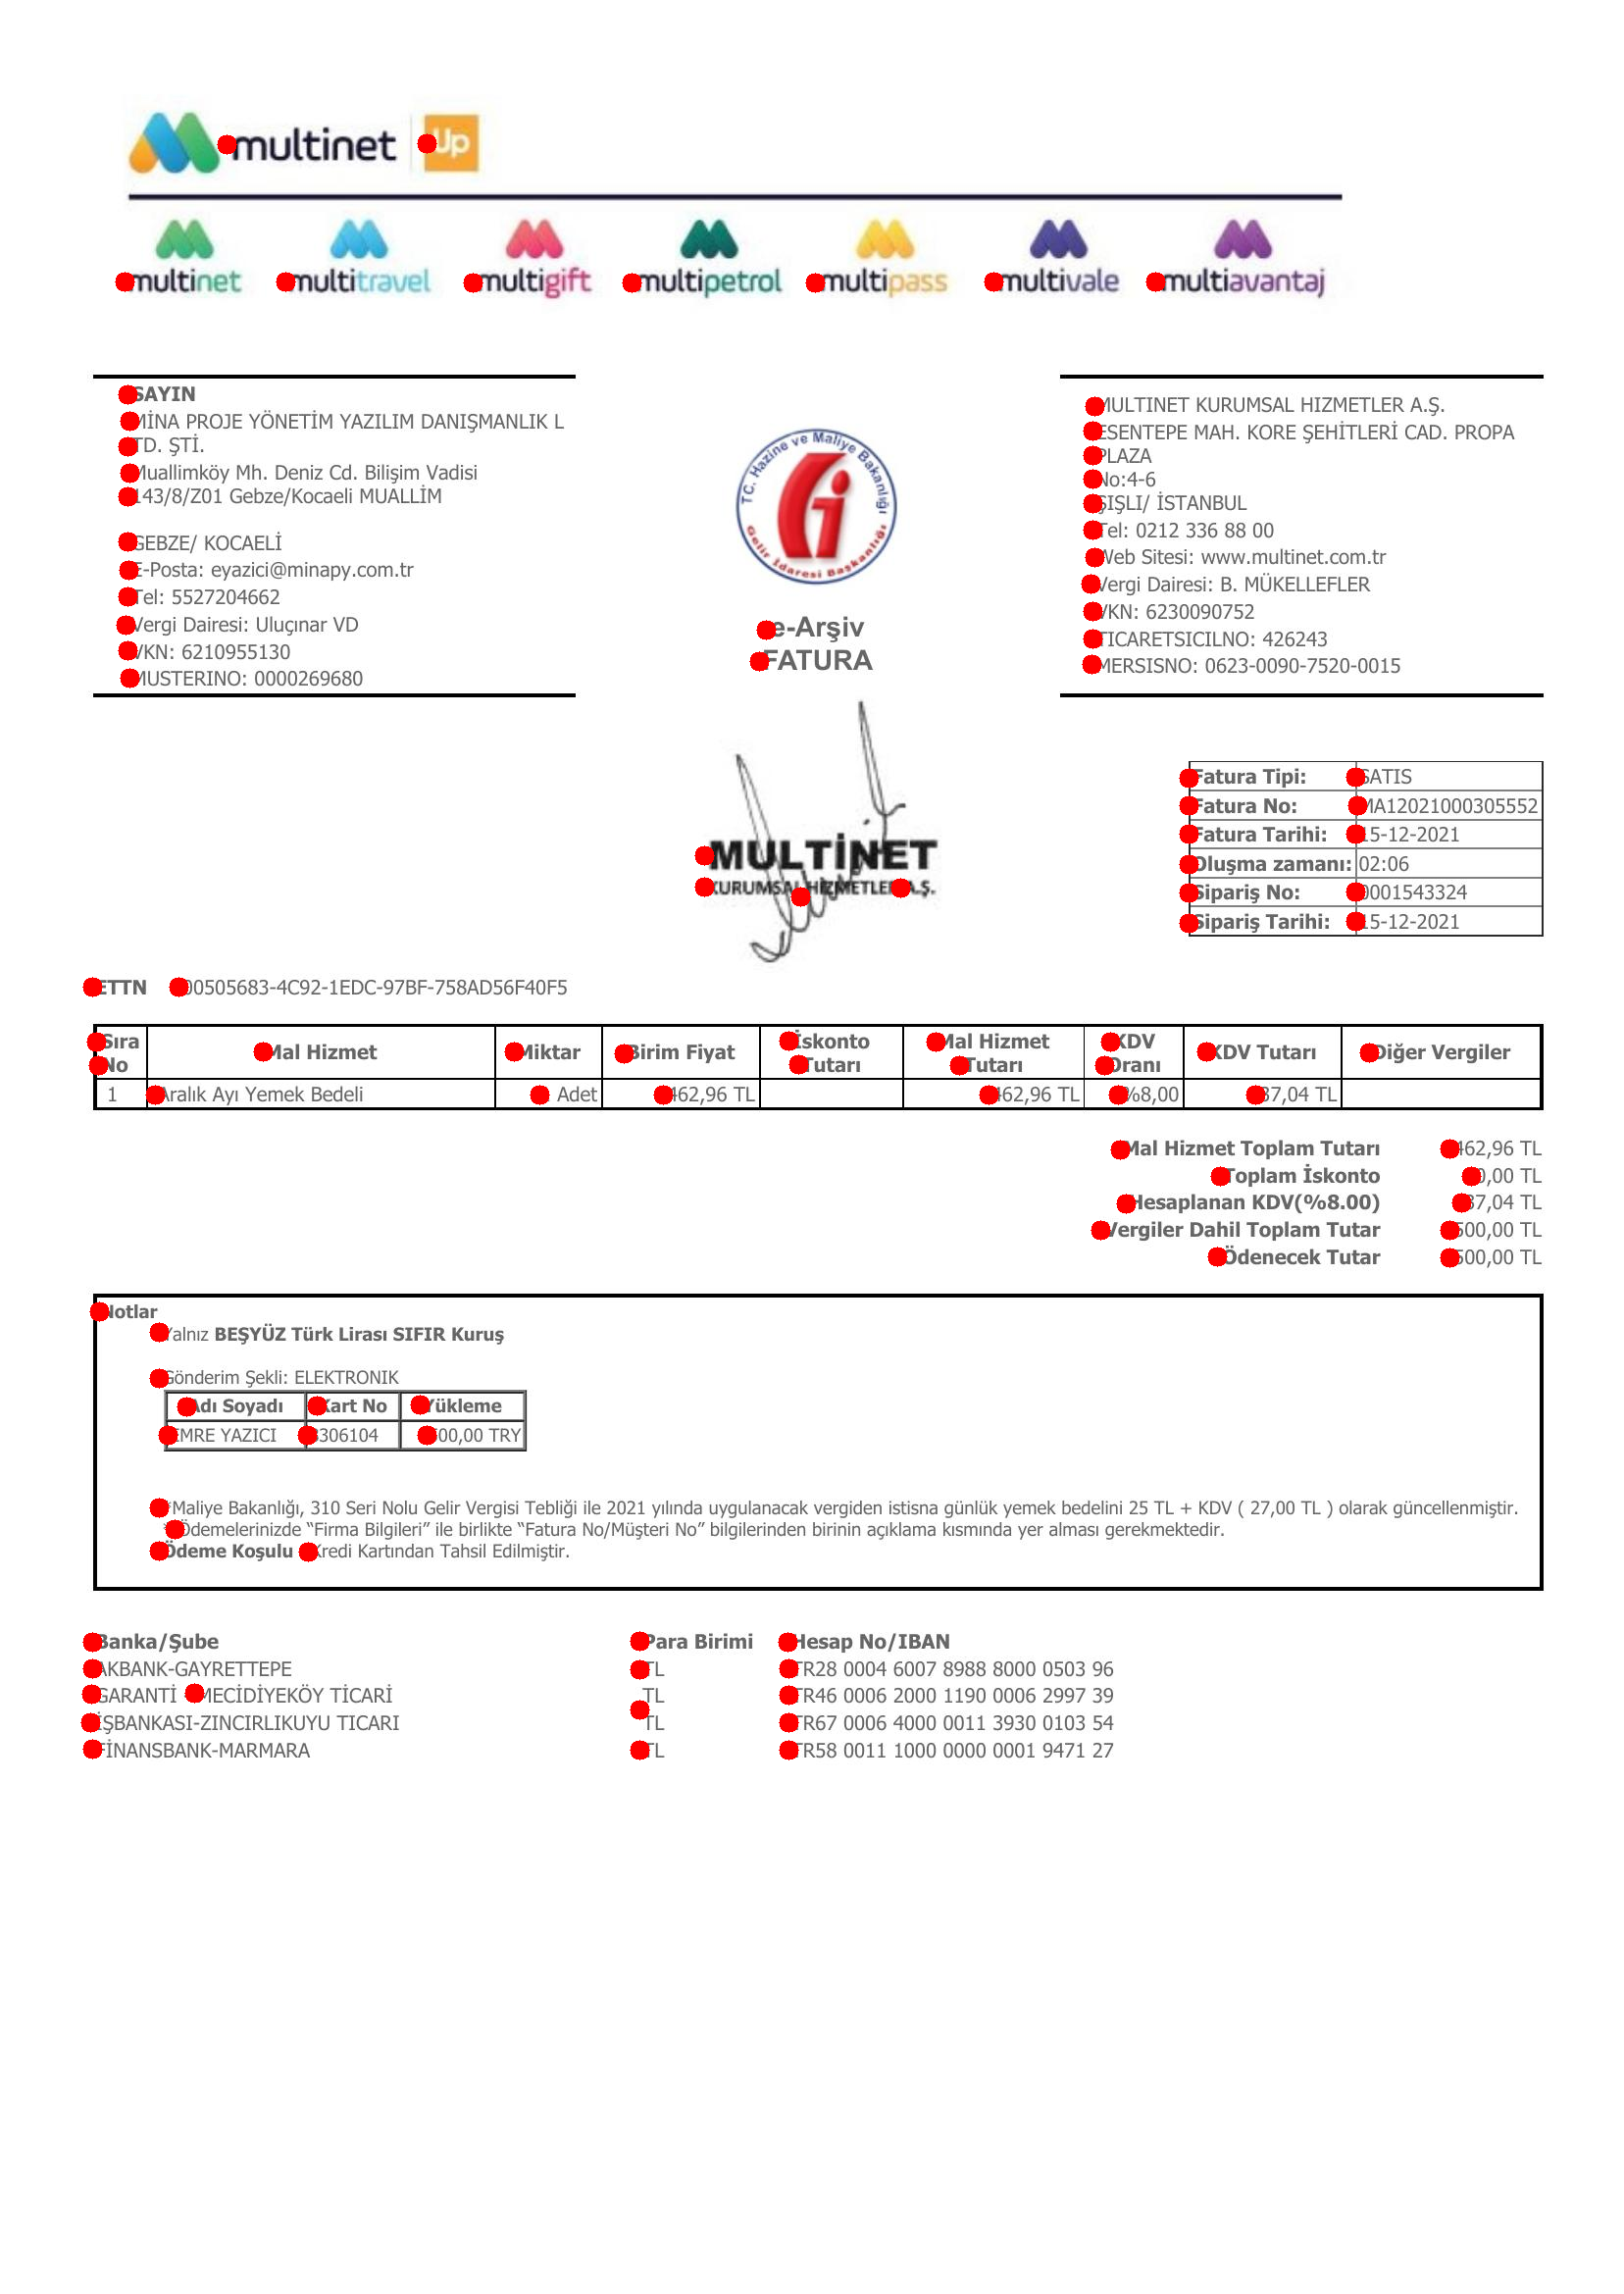

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
print(img.shape)
points=[]
points_2=[]
points_3 = []
for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    midX=int(p0[0])
    midY=int((p0[1]+p1[1]+p2[1]+p3[1])/4)
    arr=(midX,midY)
    points.append(arr)
    x1=midX/width
    y1=midY/height
    arr2=(x1,y1)
    print(p0,p1,p2,p3)
    #points_2.append(arr2)
    points_2.append((p0[0]/width,p0[0]/width))
    points_2.append((p2[0]/width,p2[0]/width))
    points_3.append((p0[1]/height,p0[1]/height))
    points_3.append((p2[1]/height,p2[1]/height))
    cv2.circle(img,(midX,midY), 10, (0,0,255), -1)

cv2_imshow(img)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
X=np.array(points_2)#orta noktaları numpy array'e çevirdim.

,gmm_cluster,count
1,7,37
3,6,28
7,5,14
4,4,23
5,3,18
2,2,37
0,1,42
6,0,15


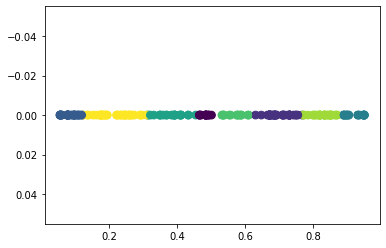

In [ ]:
#x ler için GMM
gmm = GaussianMixture(n_components=8).fit(X)
labels = gmm.predict(X)
plt.gca().invert_yaxis()
plt.scatter(X[:, 0], np.zeros(len(X[:,0])), c=labels, s=60,  cmap='viridis');

X_df = pd.DataFrame(X)
gmm_cluster = pd.DataFrame(labels)  

df = pd.concat([X_df, gmm_cluster], axis=1)
df.columns = ['Feature 1', 'Feature 2', 'gmm_cluster']
df.head()

view_cluster = df['gmm_cluster'].value_counts().T
view_cluster = pd.DataFrame(data=view_cluster)
view_cluster = view_cluster.reset_index()
view_cluster.columns = ['gmm_cluster', 'count']
view_cluster.sort_values(by='gmm_cluster', ascending=False)


[[0.48329308 0.48329308]
 [0.6989303  0.6989303 ]
 [0.08364343 0.08364343]
 [0.92143049 0.92143049]
 [0.38035602 0.38035602]
 [0.56983264 0.56983264]
 [0.83022774 0.83022774]]


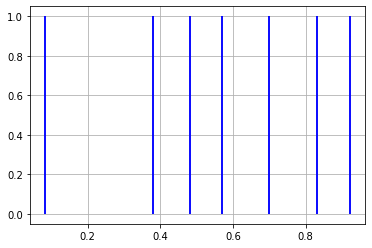

In [ ]:
#Centerları bul gmm x
cluster_count=len(gmm_cluster.value_counts())
centers=[]
for i in range(0,cluster_count-1):
  points_of_cluster= X[labels==i,:]
  centroid_of_cluster = np.mean(points_of_cluster, axis=0)
  centers.append(centroid_of_cluster)
  
arr_center=np.array(centers)
print(arr_center)
plt.vlines(arr_center,0,1,color='blue')
plt.grid()
plt.show()

,gmm_cluster,count
5,7,22
6,6,21
1,5,32
7,4,18
2,3,30
0,2,40
4,1,25
3,0,26


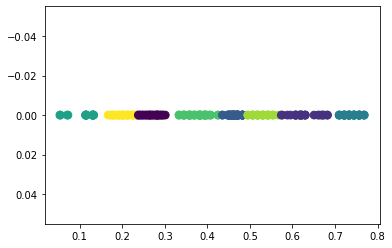

In [ ]:
#yler için 
Y=np.array(points_3)#orta noktaları numpy array'e çevirdim.
gmm = GaussianMixture(n_components=8).fit(Y)
labels_y = gmm.predict(Y)
plt.gca().invert_yaxis()
plt.scatter(Y[:, 0], np.zeros(len(Y[:,0])), c=labels_y, s=60,  cmap='viridis');

Y_df = pd.DataFrame(Y)
gmm_cluster = pd.DataFrame(labels_y)  

df = pd.concat([Y_df, gmm_cluster], axis=1)
df.columns = ['Feature 1', 'Feature 2', 'gmm_cluster']
df.head()

view_cluster = df['gmm_cluster'].value_counts().T
view_cluster = pd.DataFrame(data=view_cluster)
view_cluster = view_cluster.reset_index()
view_cluster.columns = ['gmm_cluster', 'count']
view_cluster.sort_values(by='gmm_cluster', ascending=False)


[[0.48963945 0.48963945]
 [0.39251613 0.39251613]
 [0.46091538 0.46091538]
 [0.45981189 0.45981189]
 [0.51978735 0.51978735]
 [0.3867648  0.3867648 ]
 [0.38093202 0.38093202]]


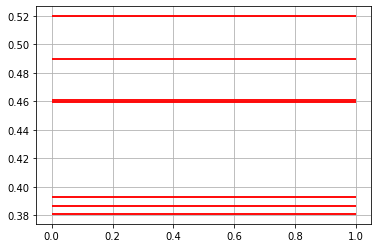

In [ ]:
#Centerları bul gmm Y
cluster_count=len(gmm_cluster.value_counts())
centers_y=[]
for i in range(0,cluster_count-1):
  points_of_cluster= Y[labels==i,:]
  centroid_of_cluster = np.mean(points_of_cluster, axis=0)
  centers_y.append(centroid_of_cluster)
  
arr_center_y=np.array(centers_y)
print(arr_center_y)
plt.hlines(arr_center_y,0,1,color='red')
plt.grid()
plt.show()

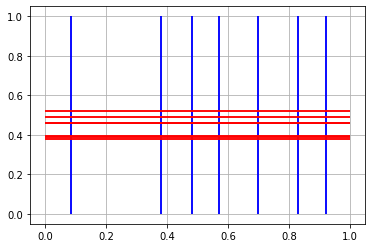

In [ ]:
#Aynı resim üzerinde çizimi

plt.vlines(arr_center,0,1,color='blue')
plt.hlines(arr_center_y,0,1,color='red')
plt.grid()
plt.show()

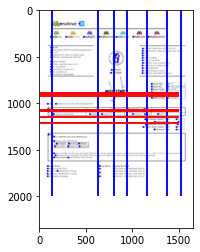

In [ ]:
arr_lines_x=(arr_center*width)
arr_lines_y=(arr_center_y*height)
data_int_x = arr_lines_x.astype(int)
data_int_y = arr_lines_y.astype(int)

plt.vlines(data_int_x,2000,1,color='blue')
plt.hlines(data_int_y,1500,1,color='red')

plt.imshow(img)